In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44373")
client

<Client: 'tcp://127.0.0.1:44373' processes=8 threads=32, memory=246.60 GiB>

In [2]:
import cartopy.crs as ccrs
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_adj
from pathlib import Path
import xarray as xr
from os.path import join,expanduser
# identify user's home directory
user_home_dir = expanduser('~')
# import the ECCOv4 py library
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
import cmocean as cmo
from matplotlib import colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np
from pathlib import Path
from pprint import pprint
import requests
import s3fs
import zarr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cmocean as cmo
from matplotlib.colors import BoundaryNorm
import matplotlib.ticker as mticker
import cmocean as cmo
from matplotlib.patches import Rectangle
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
import pandas as pd




In [3]:
# grid dir for V4r4
grid_dir0  = Path('/home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/geometry/')
ds_grid    = xr.open_dataset(grid_dir0 / 'GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc')

grid_dir   = '/efs_ecco/ECCO/EMU/emu_input_dir/emu_ref/'
wz         = ds_grid.drF * ds_grid.hFacC
dir_ref    = '/efs_ecco/ECCO/EMU/emu_input_dir/emu_ref/diags/'

vars_to_load = ['THETA', 'SALT', 'UVEL', 'VVEL']

simref      = ecco.load_ecco_vars_from_mds(dir_ref, grid_dir,
                                      #drop_unused_coords=True,
                                      mds_files = 'state_3d_set1_mon',
                                      vars_to_load = vars_to_load,
                                      output_freq_code='AVG_MON',
                                      less_output=True)

In [4]:
dir_new = '/efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_msim_PERTURBATION_20250528_040605/diags/'

simnew  = ecco.load_ecco_vars_from_mds(dir_new, grid_dir,
                                      #drop_unused_coords=True,
                                      mds_files = 'state_3d_set1_mon',
                                      vars_to_load = vars_to_load,
                                      output_freq_code='AVG_MON',
                                      less_output=True)


In [5]:
## Open the monthly velocity files 
directory  = Path('/home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_VELOCITY')
ecco_v4r5_mon_mean_native_dataset_paths = np.sort(list(directory.glob('*')))
feb17_file = next(directory.glob('*2017-02*.nc'))
print("February 2017 file is:", feb17_file)
# Then load just that one:
ds_feb17 = xr.open_dataset(feb17_file)
uvel1    = ds_feb17.UVEL
vvel1    = ds_feb17.VVEL
wvel1    = ds_feb17.WVEL
uvel1fin, vvel1fin = ecco.vector_calc.UEVNfromUXVY(uvel1, vvel1, ds_grid)

February 2017 file is: /home/jovyan/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_VELOCITY/OCEAN_VELOCITY_mon_mean_2017-02_ECCO_V4r5_native_llc0090.nc


In [35]:
simref_all  = simref.sel(time=slice('2009-01-01', '2009-12-01'))
simnew_all  = simnew.sel(time=slice('2009-01-01', '2009-12-01'))  
simpert_all = simnew_all - simref_all
simpert_all

<xarray.Dataset> Size: 1GB
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 11, nv: 2)
Coordinates: (12/45)
  * i          (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    maskCtrlC  (k, tile, j, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskCtrlS  (k, tile, j_g, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef     (k) >f4 200B dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 88B 149772 150444 151188 ... 155580 156324 157044
    time_bnds  (time, nv) datetime64[ns] 176B 2009-01-01 ... 2009-12-01
  * time       (time) datetime64[ns] 88B 2009-01-16T12:00:00 ... 2009-11-16
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 232MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 232MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    UVEL       (time, k, tile, j, i_g) float32 232MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    VVEL       (time, k, tile, j_g, i) float32 232MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>

In [38]:
print(type(simpert_all.UVEL))
print(type(uvel1))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


In [39]:
evelpert_ls = []
nvelpert_ls = []
nrec = len(simpert_all.time)
for irec in range(nrec):
    uvelpert = simpert_all.UVEL.isel(time=irec).load()
    vvelpert = simpert_all.VVEL.isel(time=irec).load()
    
    evelpert, nvelpert= ecco.vector_calc.UEVNfromUXVY(uvelpert, 
                                                      vvelpert, 
                                                      ds_grid)
    evelpert['time'] = simpert_all.time.isel(time=irec)
    nvelpert['time'] = simpert_all.time.isel(time=irec)
    evelpert_ls.append(evelpert)
    nvelpert_ls.append(nvelpert)

In [40]:
evelpert_all = xr.concat(evelpert_ls, dim='time')
nvelpert_all = xr.concat(nvelpert_ls, dim='time')

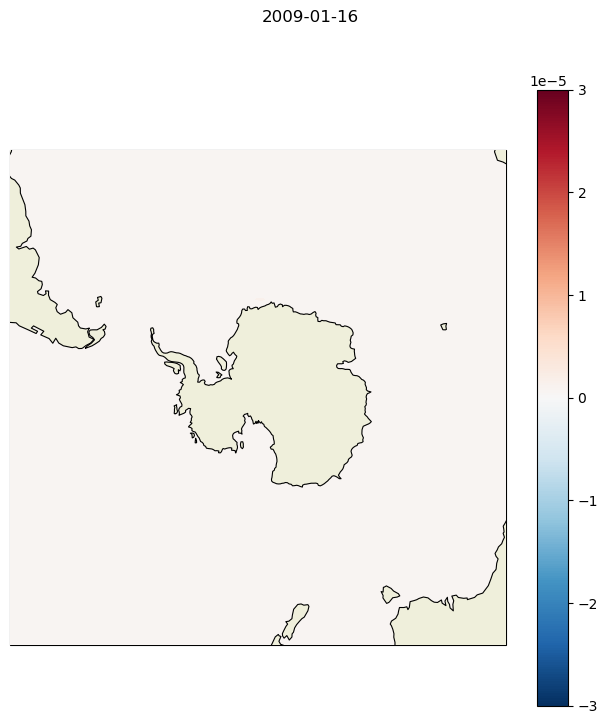

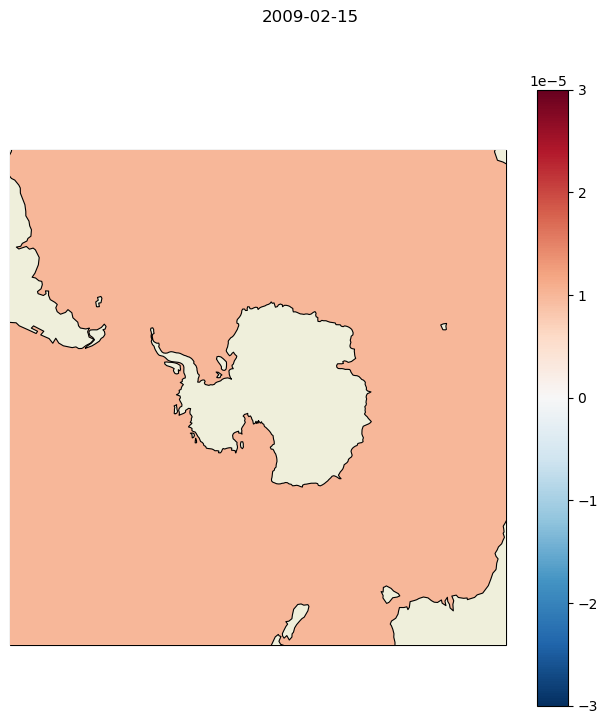

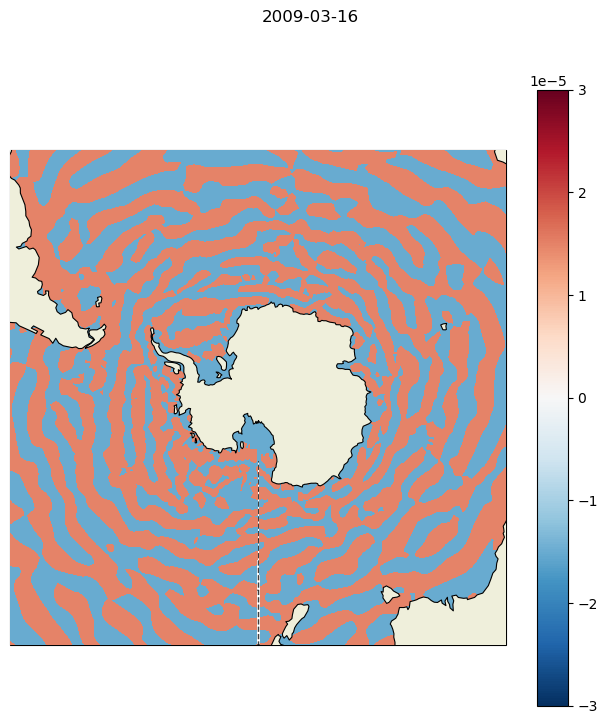

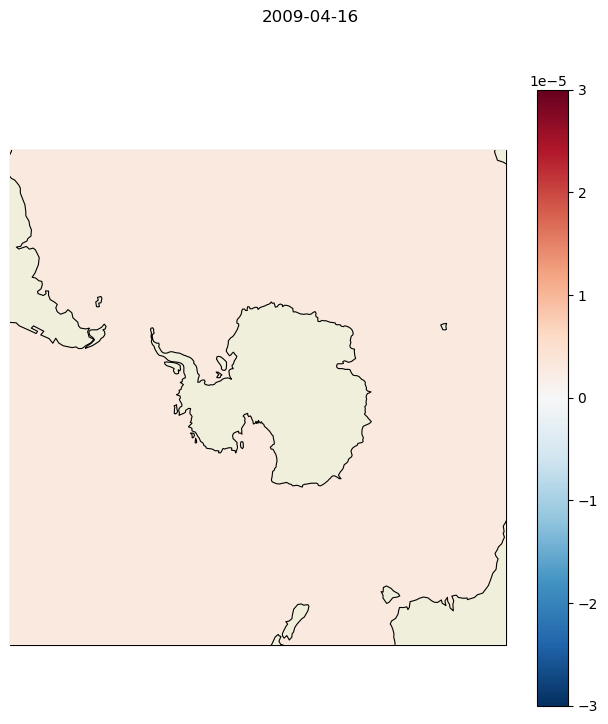

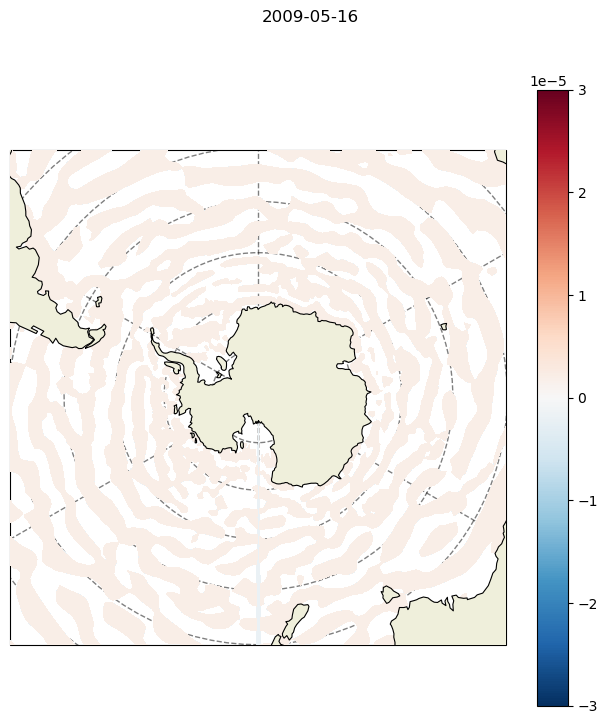

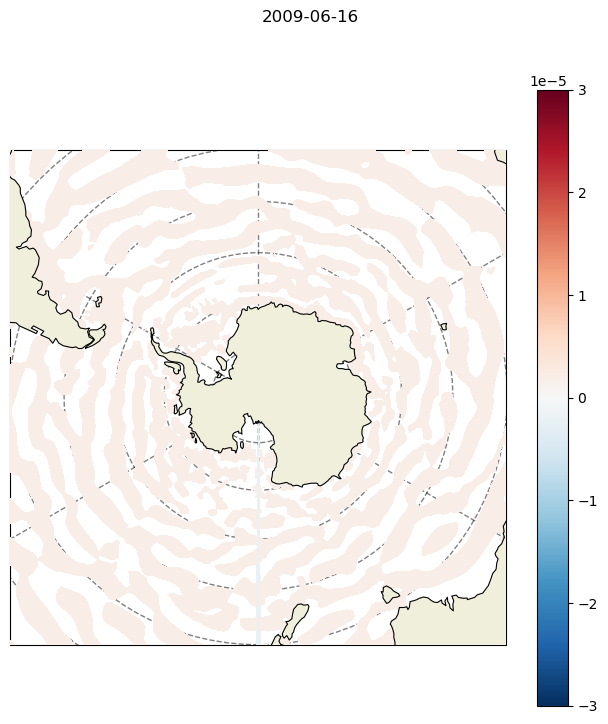

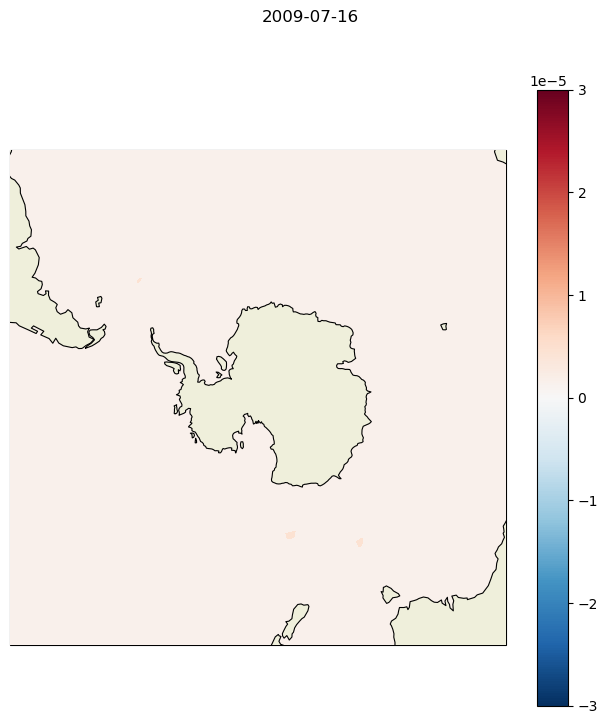

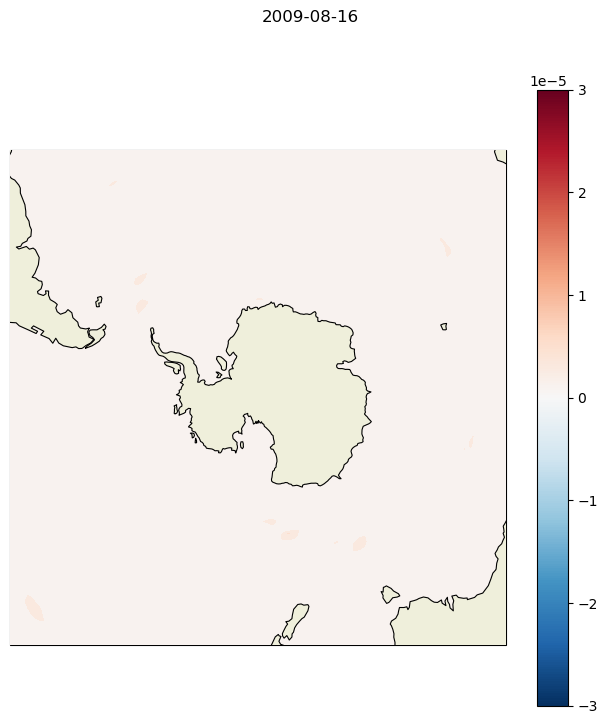

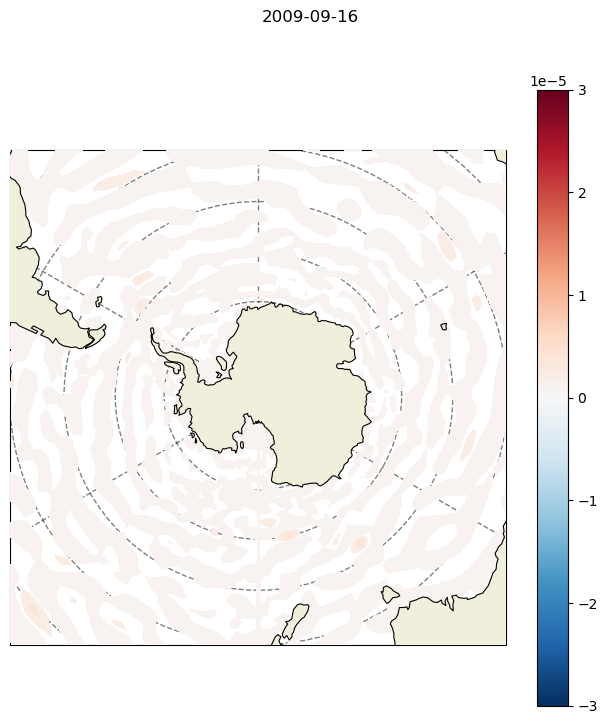

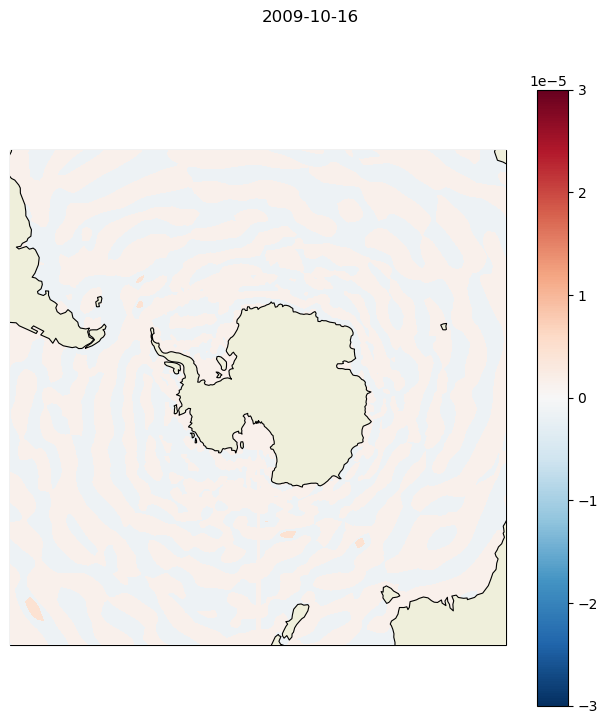

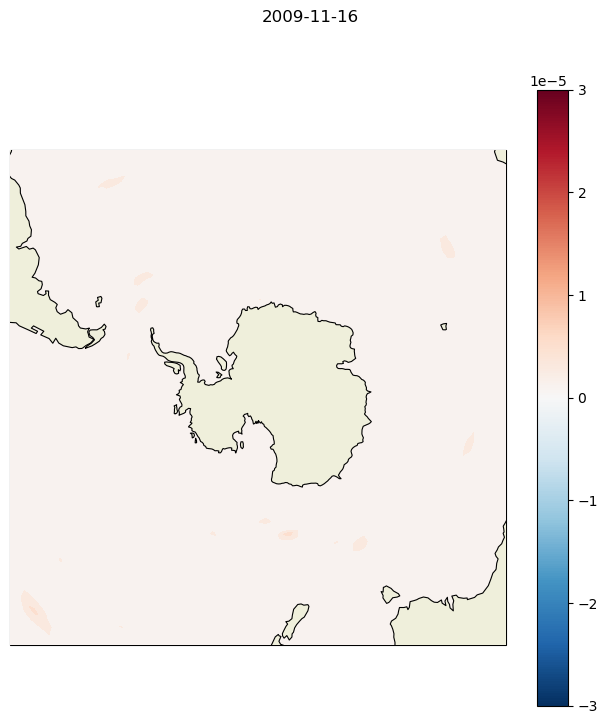

In [44]:
colorm = "RdBu_r"

for ts in range(nrec):
  plt.figure(num=ts+1, figsize=(8,8))  
  temp = ((evelpert_all*wz)[ts,0:5,:,:,:]).sum(dim=["k"],skipna=True)
  fig = ecco.plot_proj_to_latlon_grid(ds_grid.XC, ds_grid.YC, temp, 
                                    projection_type='stereo',plot_type = 'contourf', 
                                     show_colorbar=True,dx=1, dy=1,lat_lim=-40,
                                     cmin = -1e-5, cmax = 1e-5,
                                     colormap=colorm,show_coastline=True);
  fig[0].suptitle(temp.time.values.astype('str')[0:10]) 
  #plt.savefig(f'/efs_ecco/sdarma/FIGURES/PERTURBATION/UVEL_PERTURB_{ts}_tmp.png')     
  plt.close()